# Movimiento uniformemente acelerado

El movimiento uniformemente acelerado es aquél en que $\vec{a}(t)= \vec{a} = c\vec{t}e$.

Si definimos por $t_{0}$ al tiempo que marca nuestro crónometro cuando comienza el movimiento, entonces con  $\vec{v}_{0}=\vec{v}(t_{0})$ se tiene que

$$\vec{v}(t)=\vec{v}_{0}+\int_{t_{0}}^{t}\vec{a}(\bar{t}) \cdot d\bar{t} =\vec{v}_{0}+\int_{t_{0}}^{t}\vec{a} \cdot d\bar{t} 
=\vec{v}_{0}+\vec{a}\cdot \bar{t}|_{t_{0}}^{t}
=\vec{v}_{0}+\vec{a}\cdot (t-t_{0}),$$

Análogamente, si consideramos que  $\vec{r}_{0}=\vec{r}(t_{0})$ se encuentra que

$$\vec{r}(t)= \vec{r}_{0}+\int_{t_{0}}^{t}\vec{v}(\bar{t}) \cdot d\bar{t}
= \vec{r}_{0}+\int_{t_{0}}^{t} \left(\vec{v}_{0}+\vec{a} \cdot (t-t_{0})\right) \cdot d\bar{t}
= \vec{r}_{0}+\left(\vec{v}_{0} \cdot \bar{t}+\frac{1}{2}\vec{a} \cdot \bar{t}^2\right)|_{t_{0}}^{t}$$

$$\vec{r}(t)=\vec{r}_{0}+\vec{v}_{0} \cdot (t-t_{0})+\frac{1}{2}\vec{a} \cdot (t-t_{0})^2.$$

Si el movimiento se da en el plano $XY$, con $\vec{r}_{0}=x_{0}\hat{i}+y_{0}\hat{j}$, $\vec{v}_{0}=v_{0x}\hat{i}+v_{0y}\hat{j}$ y $\vec{a}=a_{x}\hat{i}+a_{y}\hat{j}$, entonces 

$$\vec{r}(t)=\left(\frac{}{}x(t)\hat{i}+y(t)\hat{j}\frac{}{}\right) [m],\quad \vec{v}(t)=\left(\frac{}{}v_x(t)\hat{i}+v_y(t)\hat{j}\frac{}{}\right) \left[\frac{m}{s}\right],$$


donde $x(t)$, $y(t)$, $v_x(t)$ y $v_y(t)$ poseen la siguiente la forma:

$$x(t)=x_{0}+v_{0x} \cdot (t-t_{0})+\frac{1}{2}a_{x} \cdot (t-t_{0})^2, \quad y(t)=y_{0}+v_{0y} \cdot (t-t_{0})+\frac{1}{2}a_{y} \cdot (t-t_{0})^2,$$
$$v_x(t)=v_{0x}+a_{x} \cdot (t-t_{0}), \quad v_y(t)=v_{0y}+a_{y} \cdot (t-t_{0}).$$

Notar que la altura ($y_{m}=y(t_m)$) es máxima cuando $v_{y}(t_{m})=0$. De la ecuación precedente se deduce que $t_{m}=t_0-\frac{v_{y0}}{a_y}$.

En particular, si $t_0=0[s]$ se tiene que:

$$x(t)=x_{0}+v_{0x} \cdot t+\frac{1}{2}a_{x} \cdot t^2, \quad y(t)=y_{0}+v_{0y} \cdot t+\frac{1}{2}a_{y} \cdot t^2.$$
$$v_x(t)=v_{0x}+a_{x} \cdot t, \quad v_y(t)=v_{0y}+a_{y} \cdot t.$$

Que es la forma en que suelen aparecer estas ecuaciones en los libros.

In [1]:
#Written by Nataly Ibarra at August 2016.
#Licensed under Creative Commons 4.0. See http://creativecommons.org/licenses/by/4.0
#For details contact natalynicole.ibarravera@gmail.com
%matplotlib inline 
# Esta línea permite incrustar gráficos en el notebook
import matplotlib.pyplot as plt # Se importa paquete que permite graficar
import numpy as np # Se import paquete que hace cálculos numéricos

In [2]:
def dynamics(t,t0,r0,v0,a):
    x0,y0 = r0[0],r0[1]
    vx0,vy0 = v0[0],v0[1]
    ax0,ay0 = a[0],a[1]
    print(70*'=')
    print('Condiciones iniciales:')
    print('t0 =',t0)
    print('r0 = %2.1fxi + %2.1fxj'%(x0,y0))
    print('v0 = %2.1fxi + %2.1fxj'%(vx0,vy0))
    print('a0 = %2.1fxi + %2.1fxj'%(ax0,ay0))
    print(70*'=')
    def x(t):
        return x0+vx0*(t-t0)+(ax0/2.)*(t-t0)**2
    def y(t):
        return y0+vy0*(t-t0)+(ay0/2.)*(t-t0)**2
    def vx(t):
        return vx0+ax0*(t-t0)
    def vy(t):
        return vy0+ay0*(t-t0)
    def ax(t):
        return (ax0*t)/t
    def ay(t):
        return (ay0*t)/t
    if ay0!=0:
        tm = t0-vy0/ay0
        ym = y(tm) 
        print('Tiempo de altura máxima :',tm)
        print('Altura máxima :',ym)
        print(70*'=')
    x_v,y_v = np.vectorize(x),np.vectorize(y)
    vx_v,vy_v = np.vectorize(vx),np.vectorize(vy)
    ax_v,ay_v = np.vectorize(ax),np.vectorize(ay)
    return [x_v(t),y_v(t),vx_v(t),vy_v(t),ax_v(t),ay_v(t)]

In [3]:
def plot_dynamics(t,t0,r0,v0,a):
    x,y,vx,vy,ax,ay = dynamics(t=t,t0=t0,r0=r0,v0=v0,a=a)
    #Se dibujan coordenadas v/s tiempo
    plt.xkcd() # esta línea permite dar el aspecto de que se dibuja a mano
    plt.figure(figsize=(6,6))
    plt.plot(t,x,label='$x(t)$')
    plt.plot(t,y,label='$y(t)$')
    plt.ylim([-1,plt.ylim()[-1]])
    plt.title(u'Posición',fontsize=18)
    plt.xlabel('$t$ [s]',fontsize=18)
    plt.ylabel('$x(t)$, $y(t)$ [m]',fontsize=18)
    plt.ylim([plt.ylim()[-0]-1,plt.ylim()[-1]+1])
    plt.grid()
    plt.legend()
    #Se dibujan componentes de velocidad v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,vx,label='$v_{x}(t)$')
    plt.plot(t,vy,label='$v_{y}(t)$')
    plt.title(u'Velocidad',fontsize=18)
    plt.xlabel('$t$ [$s$]',fontsize=18)
    plt.ylabel(r'$v_{x}(t)$, $v_{y}(t)$ [$ \frac{m}{s}$]',fontsize=18)
    plt.ylim([plt.ylim()[-0]-1,plt.ylim()[-1]+1])
    plt.grid()
    plt.legend()
    #Se dibujan componentes de aceleración v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,ax,label='$a_{x}(t)$')
    plt.plot(t,ay,label='$a_{y}(t)$')
    plt.title(u'Aceleración',fontsize=18)
    plt.xlabel('$t$ [$s$]',fontsize=18)
    plt.ylabel(r'$a_{x}(t)$, $a_{y}(t)$ [$ \frac{m}{s^2}$]',fontsize=18)
    plt.ylim([plt.ylim()[-0]-1,plt.ylim()[-1]+1])
    plt.grid()
    plt.legend()

# Movimiento Horizontal

Supongamos que $\vec{v}_0=v_{x0}\hat{i}$ y $\vec{a}=a_{x}\hat{i}$, con $v_{x0}>0$ y $a_{x}>0$.

In [4]:
#condiciones iniciales
t0 = 0 #[s]
t = np.linspace(0.001,2,100) #[s]
r0 = [0,0] #[m]
v0 = [2,0] #[m/s]
a = [10,0] #[m/s^2]

In [5]:
#x,y,vx,vy,ax,axy = dynamics(t=t,t0=t0,r0=r0,v0=v0,a=a)

Condiciones iniciales:
t0 = 0
r0 = 0.0xi + 0.0xj
v0 = 2.0xi + 0.0xj
a0 = 10.0xi + 0.0xj


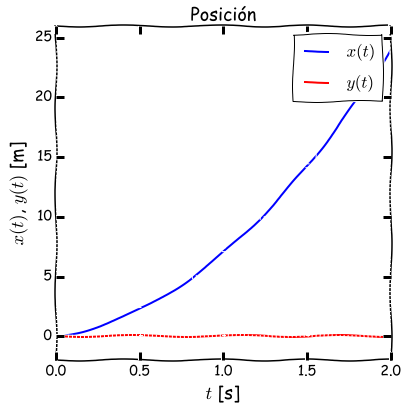

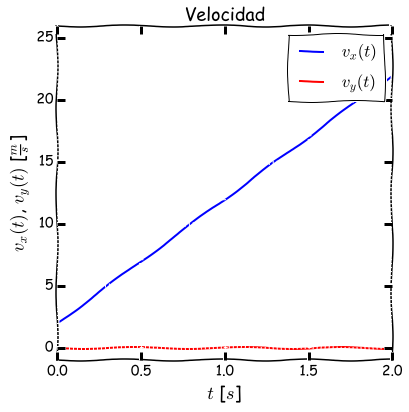

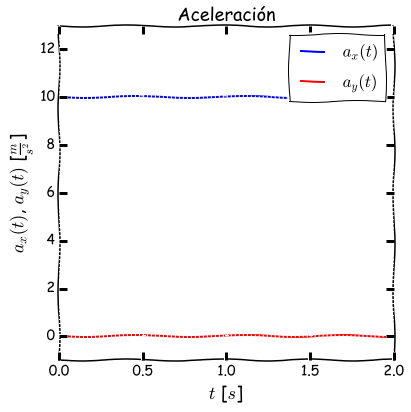

In [6]:
plot_dynamics(t=t,t0=t0,r0=r0,v0=v0,a=a)

# Lanzamiento vertical hacia arriba:

En el caso de caída libre $\vec{a}=g\hat{j}$, con $g=-9.8$ $[m/s^2]$ $\vec{r}_{0}=r_{y0}\hat{j}$ y $\vec{v}_{0}=v_{y0}\hat{j}$, tales que $r_{y0}\geq0$ $v_{y0}>0$.

In [7]:
#condiciones iniciales
t0 = 0 #[s]
t = np.linspace(0.001,2,100) #[s]
r0 = [0,10] #[m]
v0 = [0,2] #[m/s]
a = [0,-9.8] #[m/s]

In [8]:
#x,y,vx,vy,ax,axy = dynamics(t=t,t0=t0,r0=r0,v0=v0,a=a)

Condiciones iniciales:
t0 = 0
r0 = 0.0xi + 10.0xj
v0 = 0.0xi + 2.0xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 0.2040816326530612
Altura máxima : 10.204081632653061


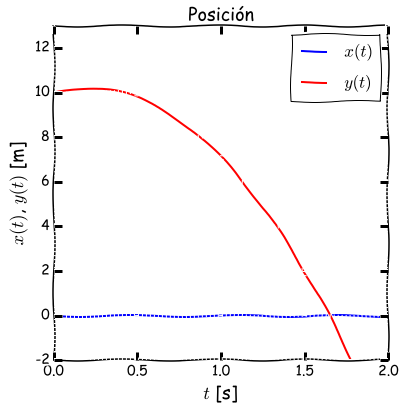

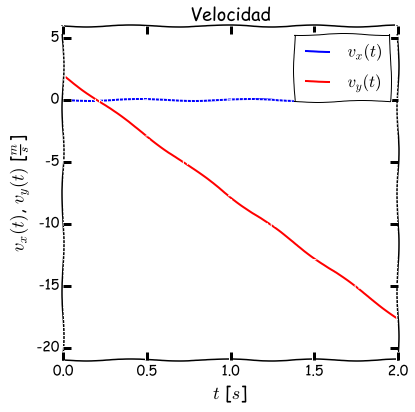

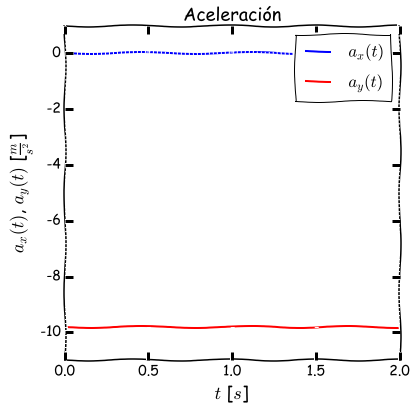

In [9]:
plot_dynamics(t=t,t0=t0,r0=r0,v0=v0,a=a)

# Movimiento Parabólico:

En el caso de caída libre $\vec{a}=g\hat{j}$, con $g=-9.8$ $[m/s^2]$, $\vec{r}_{0}=r_{x0}\hat{i}+r_{y0}\hat{j}$ y $\vec{v}_{0}=v_{x0}\hat{i}+v_{y0}\hat{j}$, tales que $r_{x0}\geq0$,$r_{y0}\geq0$, $v_{x0}>0$ y $v_{y0}>0$.

In [10]:
#condiciones iniciales
t0 = 0 #[s]
t = np.linspace(0.001,12,100) #[s]
r0 = [1,2] #[m]
v0 = [100/12,6*9.8] #[m/s]
a = [0,-9.8] #[m/s^2]

Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4


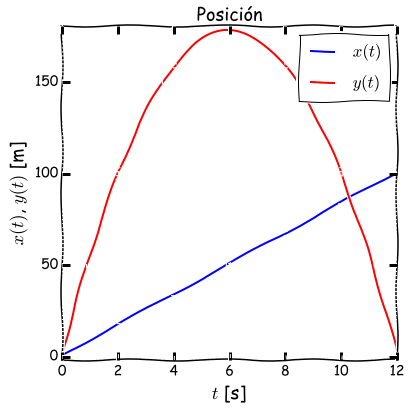

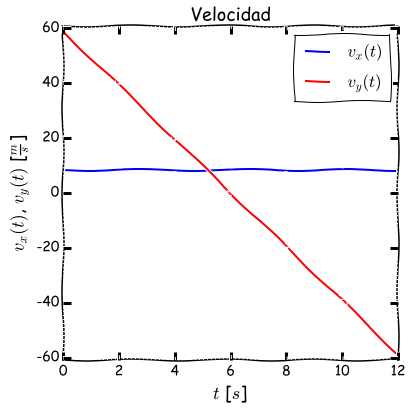

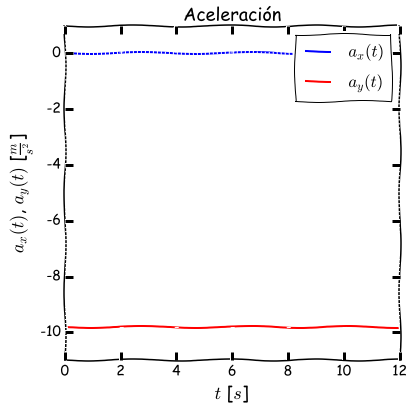

In [11]:
plot_dynamics(t=t,t0=t0,r0=r0,v0=v0,a=a)

# Animación de Movimiento Parabólico

A continuación se muestra una animación de lo sucedido.

In [12]:
from __future__ import print_function, division
import vpython as vp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
#condiciones iniciales, las mismas de antes
t0 = 0 #[s]
t = np.linspace(0.001,12,100) #[s]
r0 = [1,2] #[m]
v0 = [100/12,6*9.8] #[m/s]
a = [0,-9.8] #[m/s^2]

In [14]:
#Se configura la escena de la animación
vp.scene.title = ("Trayectoria del cuerpo")
vp.scene.background = vp.color.white
vp.scene.width = 500
vp.scene.height = 500
#
#Se dibuja SC con el que se trabajará
lenght_axis = 70
shaftwidth = 1
xaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(1,0,0), shaftwidth=shaftwidth)
xlabel = vp.label(pos=vp.vector(lenght_axis+0.1,0,0), text="X", color=vp.color.black, opacity=0, height=20, box=0)
yaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(0,1,0), shaftwidth=shaftwidth)
ylabel = vp.label(pos=vp.vector(0,lenght_axis+0.1,0), text="Y", color=vp.color.black, opacity=0, height=20, box=0)
zaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(0,0,1), shaftwidth=shaftwidth)
xlabel= vp.label(pos=vp.vector(0,0,lenght_axis+0.1), text="Z", color=vp.color.black, opacity=0, height=20, box=0)

In [15]:
x0,y0,z0 = r0[0],r0[1],0
vx0,vy0,vz0 = v0[0],v0[1],0
ax0,ay0,az0 = a[0],a[1],0

In [16]:
#Se dibujan cantidades físicas a animar
r_vector = vp.vector(x0,y0,z0)
r_axis = vp.arrow(pos=vp.vector(0,0,0), axis = r_vector, color=vp.color.red, shaftwidth=shaftwidth)
r_label = vp.label(pos=r_vector+15*r_vector/r_vector.mag, text="r", color=r_axis.color, opacity=0, height=30, box=0)
v_vector = vp.vector(vx0,vy0,z0)
alpha = 30
v_axis = vp.arrow(pos=r_vector, axis = alpha*v_vector/v_vector.mag, color=vp.color.green, shaftwidth=shaftwidth)
v_label= vp.label(pos=r_vector+v_axis.axis+15*v_vector/v_vector.mag, text="v", color=v_axis.color, opacity=0, height=30, box=0)
a_vector = vp.vector(ax0,ay0,az0)
a_axis = vp.arrow(pos=r_vector, axis = alpha*a_vector/a_vector.mag, color=vp.color.blue, shaftwidth=shaftwidth)
a_label = vp.label(pos=r_vector+a_axis.axis+5*a_vector/a_vector.mag, text="a", color=a_axis.color, opacity=0, height=30, box=0)
#t_label = vp.label(pos=r_vector+30*r_vector/r_vector.mag, text="t = 0 [s]", color=vp.color.black, opacity=0, height=20, box=0)
t_label = vp.label(pos=vp.vector(50,10,0), text="t = 0 [s]", color=vp.color.black, opacity=0, height=10, box=0)

Notar que:

$\vec{v}(t)$ es tangente a la trayectoria en todo punto.

$\vec{a}$ apunta siempre en la dirección (-Y)!

A los 12 [s] el cuerpo toca el suelo y continúa cayendo!

In [17]:
#Se hace evolucionar la animación
t = np.linspace(0.001,12.5,1000)
for ti in t:
    vp.rate(50)
    rxi,ryi,vxi,vyi,axi,ayi = dynamics(t=ti,t0=t0,r0=r0,v0=v0,a=a)
    rzi,vzi,azi = 0,0,0
    t_label.text = "t = %2.1f [s]"%ti
#t_label.pos = r_vector+30*r_vector/r_vector.mag
    r_vector = vp.vector(rxi,ryi,rzi)
    v_vector = vp.vector(vxi,vyi,vzi)
    a_vector = vp.vector(axi,ayi,azi)
    r_axis.axis = r_vector
    v_axis.pos = r_vector
    v_axis.axis =  alpha*v_vector/v_vector.mag
    a_axis.pos = r_vector
    a_axis.axis =  alpha*a_vector/a_vector.mag
    r_label.pos = r_vector+15*r_vector/r_vector.mag
    v_label.pos = r_vector+v_axis.axis+15*v_vector/v_vector.mag
    a_label.pos = r_vector+a_axis.axis+15*a_vector/a_vector.mag
    vp.sphere(pos=r_vector, radius=0.5, color=r_axis.color)

Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones iniciales:
t0 = 0
r0 = 1.0xi + 2.0xj
v0 = 8.3xi + 58.8xj
a0 = 0.0xi + -9.8xj
Tiempo de altura máxima : 6.0
Altura máxima : 178.4
Condiciones i